## Metropolis Algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import multiprocess as mp

#Create a an array nxm of spins arranged randomly

def spinarray(n,m):
    A=np.random.randint(0,2,(n,m))
    x=0
    while x<A.shape[0]:
        y=0
        while y<A.shape[1]:
            if A[x,y]==0:
                A[x,y]=-1
            y=y+1
        x=x+1
    return A

#Choosing random particle

def ranij(Array):
    ri=np.random.randint(0,Array.shape[0])
    rj=np.random.randint(0,Array.shape[1])
    return ri,rj

#Calculating Total Energy

def TE(Array,J,H):
    T1=0
    i=0
    while i<Array.shape[0]:
        j=0
        if i==0:
            while j<(Array.shape[1]-1):
                T1=T1+(J*(Array[i,j])*(Array[i,j+1]))
                j=j+1
        if i!=0:
            while j<(Array.shape[1]-1):
                T1=T1+(J*(Array[i,j])*(Array[i,j+1]))
                j=j+1
            j=0
            while j<(Array.shape[1]):
                T1=T1+(J*(Array[i,j])*(Array[i-1,j]))
                j=j+1
        i=i+1
    T2=0
    x=0
    y=0
    while x<Array.shape[0]:
        y=0
        while y<Array.shape[1]:
            T2=T2+(H*Array[x,y])
            y=y+1
        x=x+1
    T=-T1-T2
    return T

#flipping the spin of B at i,j

def flip(C,i,j):
    B=np.copy(C)
    B[i,j]=-B[i,j]
    # or
    # if B[i,j]==1:
    #     B[i,j]=-1
    # elif B[i,j]==-1:
    #     B[i,j]=1
    return B



#Calculating change in the Energy

def delE(A,i,j):
    if (i==0)or(j==0)or(i==A.shape[0]-1)or(j==A.shape[1]-1):
        vertical=np.zeros((A.shape[1]), dtype=int)
        horizontal=np.zeros((A.shape[0]+2,1), dtype=int)
        Arr=np.vstack((vertical,A))
        Arr=np.vstack((Arr,vertical))
        Arr=np.hstack((horizontal,Arr))
        Arr=np.hstack((Arr,horizontal))
        n=i+1
        m=j+1
        DE=2*(J*Arr[n,m]*(Arr[n-1,m]+Arr[n,m-1]+Arr[n+1,m]+Arr[n,m+1])+(H*Arr[n,m]))
    else:
        n=i
        m=j
        DE=2*(J*A[n,m]*(A[n-1,m]+A[n,m-1]+A[n+1,m]+A[n,m+1])+(H*A[n,m]))
        
    return DE
    

In [16]:
def EquiTM(T):
    I=500000  #Iterations
    J=1
    H=1
    k=1       #Boltzmann constant
    #Generate a state
    S=spinarray(100,100)
    #Energy of state
    sum=np.sum(S)
    TE(S,J,H),sum
    Energy=[TE(S,J,H)]
    Sum=[sum]
    
    z=1
    X=1
    
    while X<=I:
        i,j=ranij(S)
        DE=delE(S,i,j)
        if DE>0:
            x=np.random.rand()
            if x<np.exp(-(DE)/(k*T)):
                S=flip(S,i,j)
                Energy=Energy+[(Energy[-1]+DE)]
                Sum=Sum+[np.sum(S)]
                z=z+1
        else:
            S=flip(S,i,j)
            Energy=Energy+[(Energy[-1]+DE)]
            Sum=Sum+[np.sum(S)]
            z=z+1
        
        X=X+1
        ss=np.mean(Sum[-1000:])
        ee=np.mean(Energy[-1000:])
    return ee,ss,Energy,Sum

In [2]:
J=H=1    #J and H the interaction parameter values
Tlow=0.5 #Initial temperature
Thigh=7  #Temperature max
div=14   #no of divisions for temperature
Temperature=np.linspace(Tlow,Thigh,div)

In [29]:
FE=[]
FM=[]

In [30]:
%%time
with mp.Pool(7) as P:
    Y = P.map( EquiTM, Temperature)

CPU times: user 1.36 s, sys: 978 ms, total: 2.34 s
Wall time: 1h 6min 57s


In [54]:
# The above code gives an array with Algorithm executed for different Tempertures, with elements being (energy value averaged for last 1000 values,magnetization averaged for last 1000 values, Energy value at accepted iteration, Magnetization value at accepted iteration)

# ME=[]
# for n in range (0,14):
#     ME=ME+[list(Y)[n][1]]
# np.savetxt('Magnetization.csv',ME, delimiter=',')

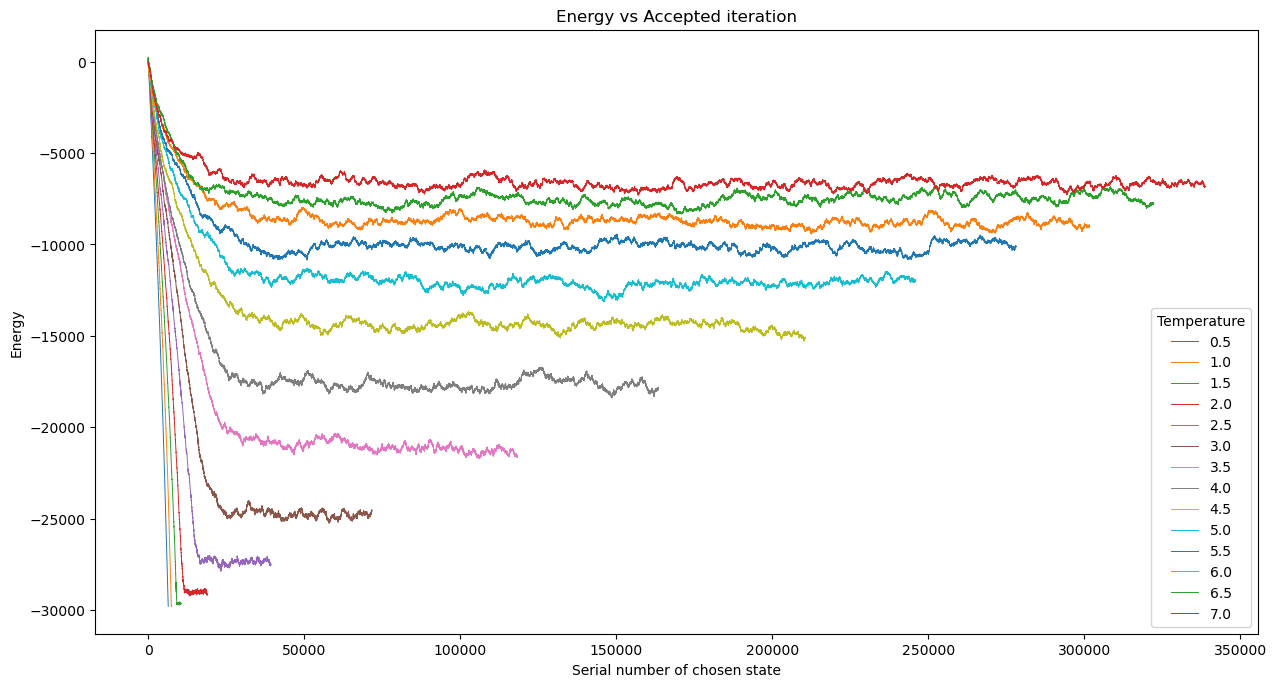

In [42]:
plt.figure(figsize=(15,8),dpi=100)
Energy=[]
for n in range (0,14):
    S=np.loadtxt('** Result folder pathname **/'+str('E'+str(n)+'.csv'))
    Energy=Energy+[S]
for n in range (0,14):
    plt.plot(Energy[n],label=str(n*0.5+0.5),linewidth=0.7)
    plt.title("Energy vs Accepted iteration")
    plt.xlabel("Serial number of chosen state",fontsize=10)
    plt.ylabel('Energy',fontsize=10)
    plt.legend(title="Temperature")

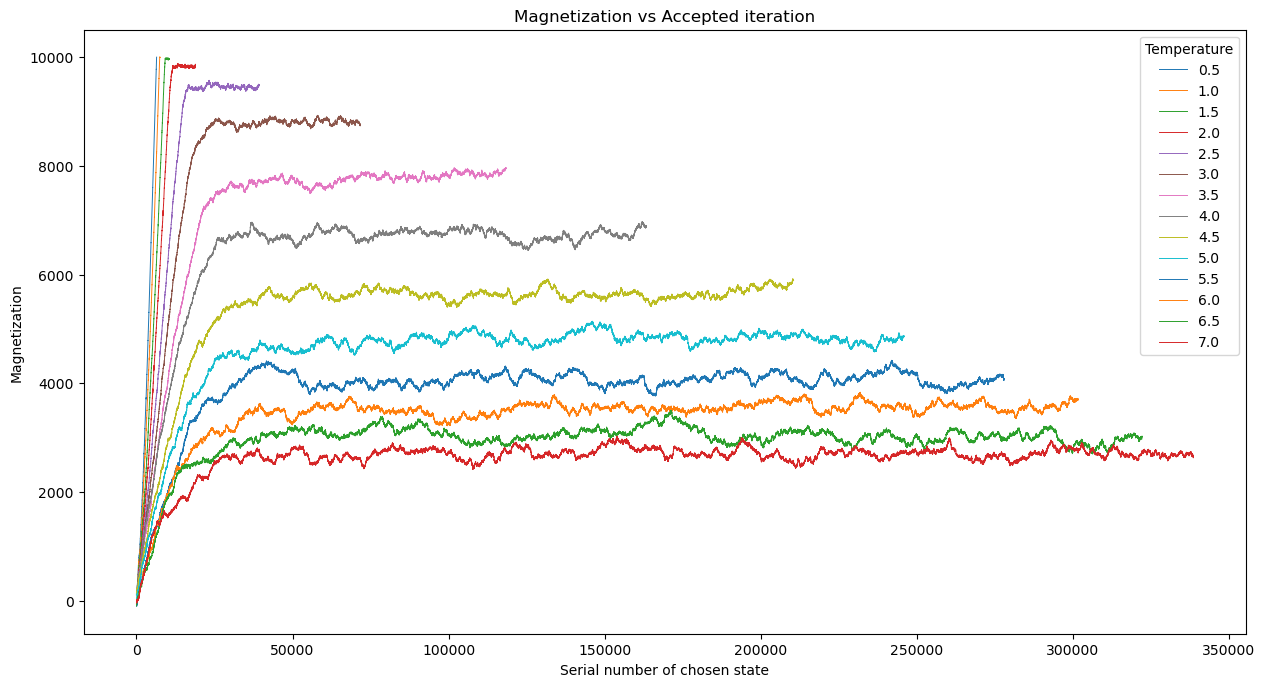

In [41]:
plt.figure(figsize=(15,8),dpi=100)
Mag=[]
for n in range (0,14):
    S=np.loadtxt('** Result folder pathname **/'+str('M'+str(n)+'.csv'))
    Mag=Mag+[S]
for n in range (0,14):
    plt.plot(Mag[n],label=str(n*0.5+0.5),linewidth=0.7)
    plt.title("Magnetization vs Accepted iteration")
    plt.xlabel("Serial number of chosen state",fontsize=10)
    plt.ylabel('Magnetization',fontsize=10)
    plt.legend(title = "Temperature")

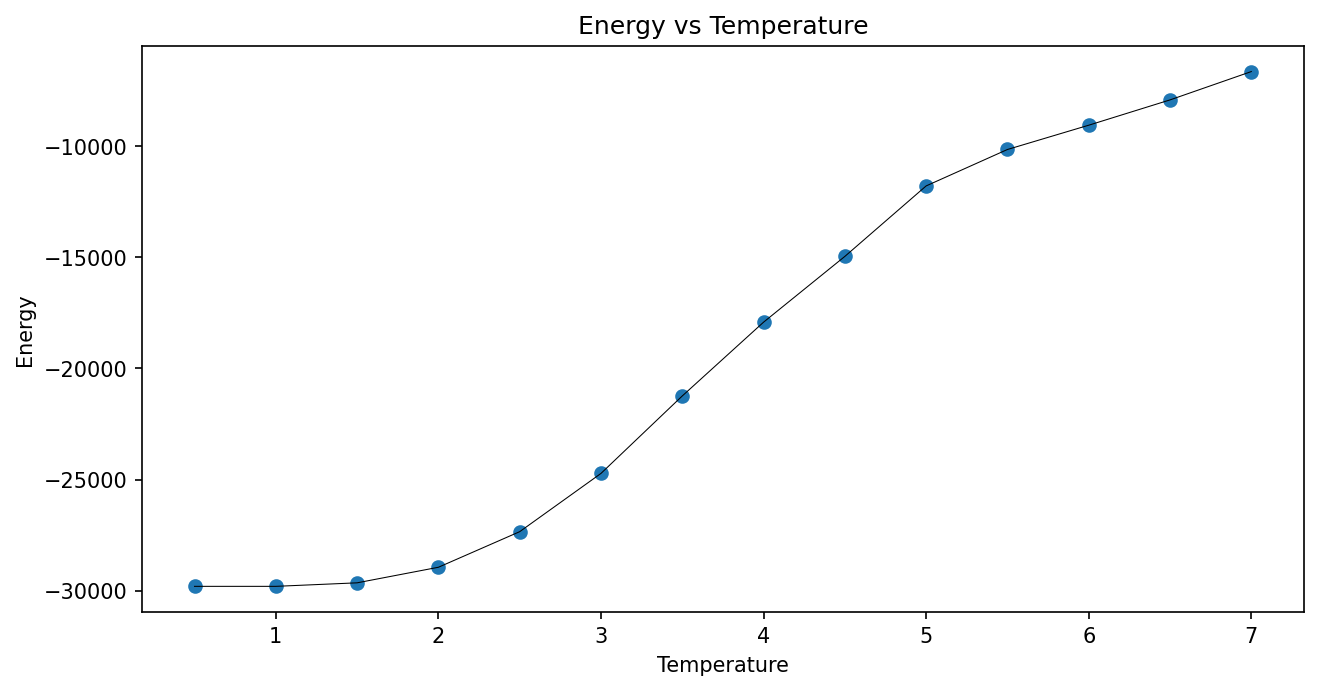

In [48]:
E=[]
for n in range (0,3):
    S=np.loadtxt('** Result folder pathname **/'+str('E'+str(n)+'.csv'))
    # plt.plot(S)
    # print(S[-1])
    E=E+[S[-1]]

for n in range (3,14):
    S=np.loadtxt('** Result folder pathname **/'+str('E'+str(n)+'.csv'))
    E=E+[np.mean(S[-2000])]

plt.figure(figsize=(10,5),dpi=150)
plt.title("Energy vs Temperature")
plt.xlabel("Temperature",fontsize=10)
plt.ylabel('Energy',fontsize=10)
plt.plot(Temperature,E,'black',linewidth=0.5)
plt.scatter(Temperature,E)

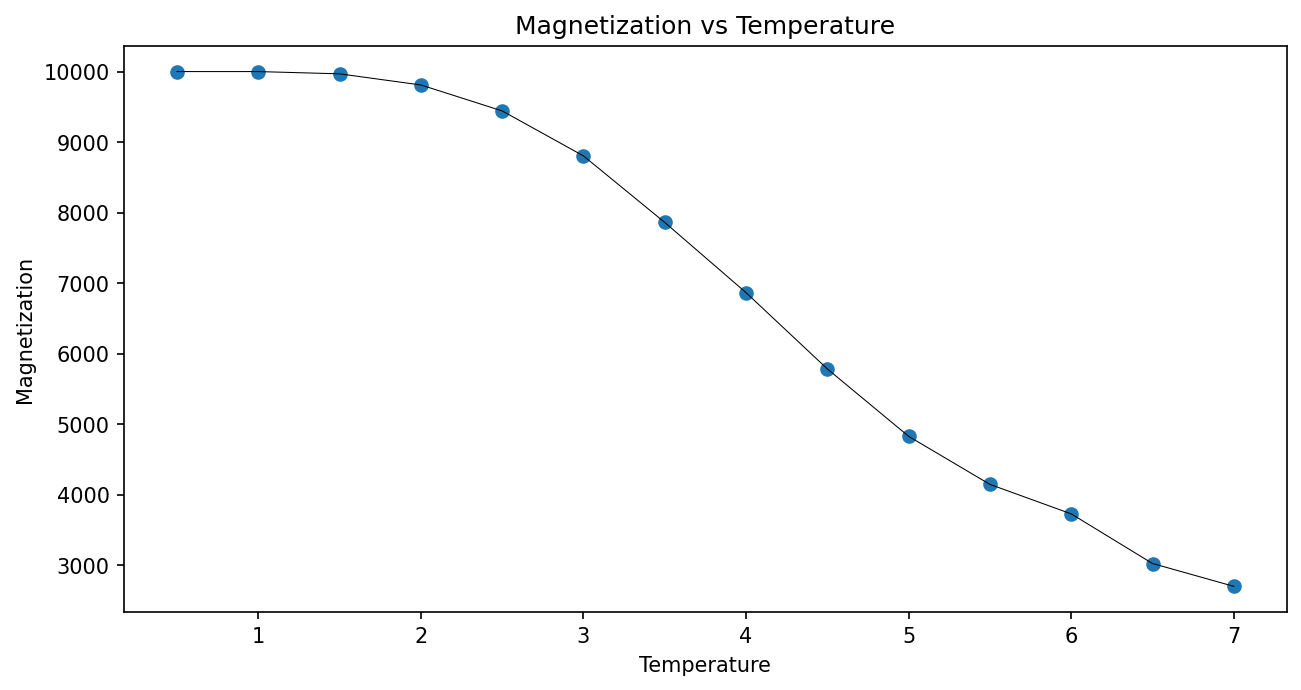

In [45]:
M=[]
for n in range (0,3):
    S=np.loadtxt('** Result folder pathname **/'+str('M'+str(n)+'.csv'))
    # plt.plot(S)
    # print(S[-1])
    M=M+[S[-1]]

for n in range (3,14):
    S=np.loadtxt('** Result folder pathname **/'+str('M'+str(n)+'.csv'))
    M=M+[np.mean(S[-2000])]

plt.figure(figsize=(10,5),dpi=150)
plt.title("Magnetization vs Temperature")
plt.xlabel("Temperature",fontsize=10)
plt.ylabel('Magnetization',fontsize=10)
plt.plot(Temperature,M,"black",linewidth=0.5)
plt.scatter(Temperature,M)